In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

In [4]:
sns.set(style="whitegrid")

interactions_file = "interactions_human.microT.mirbase.txt"
df = pd.read_csv(interactions_file, sep="\t")

print(f"Available columns: {df.columns}")

Available columns: Index(['mirna', 'ensembl_gene_id', 'interaction_score'], dtype='object')


In [6]:
count = (df["interaction_score"] < 0.34).sum()
print(f"Number of rows with interaction_score < 0.34: {count}")

Number of rows with interaction_score < 0.34: 4


In [8]:
filtered_rows = df[df["interaction_score"] < 0.34]
print(filtered_rows)

                   mirna  ensembl_gene_id  interaction_score
3361461   hsa-miR-188-3p  ENSG00000180626           0.028726
5218002  hsa-miR-3064-3p  ENSG00000167232           0.338743
5225110  hsa-miR-3064-3p  ENSG00000196268           0.000962
5225929  hsa-miR-3064-3p  ENSG00000213973           0.045017


In [10]:
x_common = np.linspace(df["interaction_score"].min(), df["interaction_score"].max(), 200)

In [12]:
mirna_kde_data = {}

for mirna, group in df.groupby('mirna'):
    kde = gaussian_kde(group['interaction_score'].dropna())  
    mirna_kde_data[mirna] = kde(x_common) 

kde_df = pd.DataFrame(mirna_kde_data, index=x_common)

# Compute mean and standard deviation KDE across all miRNAs
mean_kde = kde_df.mean(axis=1)
std_kde = kde_df.std(axis=1)

print("Mean KDE shape:", mean_kde.shape)
print("STD KDE shape:", std_kde.shape)
print("First 10 Mean KDE values:", mean_kde[:10])
print("First 10 STD KDE values:", std_kde[:10])

Mean KDE shape: (200,)
STD KDE shape: (200,)
First 10 Mean KDE values: 0.000962    9.597515e-07
0.005983    1.066953e-06
0.011003    1.159022e-06
0.016023    1.235445e-06
0.021043    1.294404e-06
                ...     
0.979919    1.302584e-01
0.984939    1.205463e-01
0.989959    1.094055e-01
0.994980    9.707639e-02
1.000000    8.399121e-02
Length: 200, dtype: float64
First 10 STD KDE values: 0.000962    0.000039
0.005983    0.000041
0.011003    0.000044
0.016023    0.000046
0.021043    0.000047
              ...   
0.979919    0.192427
0.984939    0.182787
0.989959    0.171167
0.994980    0.157745
1.000000    0.142842
Length: 200, dtype: float64


C:\Users\moris\AppData\Local\Temp\ipykernel_16048\4065732758.py:19: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print("First 10 Mean KDE values:", mean_kde[:10])
C:\Users\moris\AppData\Local\Temp\ipykernel_16048\4065732758.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print("First 10 STD KDE values:", std_kde[:10])


In [13]:
# Avoid KDE zero for plotting purposes (avoid failure)
std_kde = np.maximum(std_kde, 0.001)

Save as PNG? (yes/no):  yes


Saved as 'DIANA_microT_CDS_KDE_STD.png'.


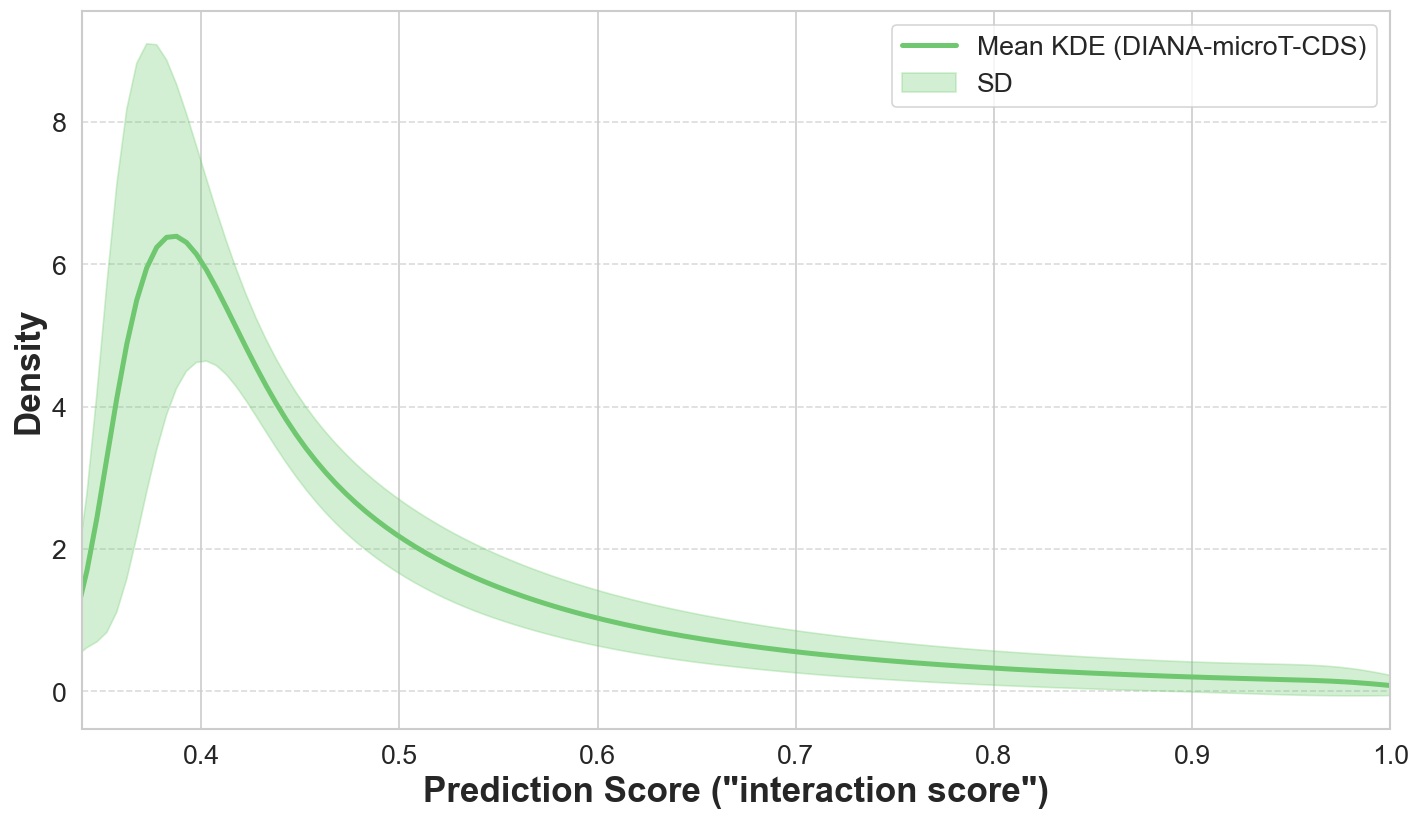

In [18]:
plt.figure(figsize=(12, 7), dpi=120)

plt.plot(x_common, mean_kde, color='#6fc76f', linewidth=3, label="Mean KDE (DIANA-microT-CDS)")

plt.fill_between(x_common, mean_kde - std_kde, mean_kde + std_kde, color='#6ecc6e', alpha=0.3, label="SD")

plt.xlabel('Prediction Score ("interaction score")', fontsize=21, fontweight="bold")
plt.ylabel('Density', fontsize=21, fontweight="bold")
plt.xlim(0.34, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=16, loc='upper right')
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()

save_plot = input("Save as PNG? (yes/no): ").strip().lower()
if save_plot == 'yes':
    plt.savefig("DIANA_microT_CDS_KDE_STD.png", format='png', dpi=300, bbox_inches='tight')
    print("Saved as 'DIANA_microT_CDS_KDE_STD.png'.")

plt.show()

In [5]:
unique_genes = df['ensembl_gene_id'].dropna().unique()

In [7]:
unique_genes_df = pd.DataFrame(unique_genes, columns=["ensembl_gene_id"])

In [9]:
unique_genes_df.to_excel("Unique Ensembl Gene IDs - DIANA-microT-CDS.xlsx", index=False)

In [19]:
print("Min Score: ", df["interaction_score"].min())
print("Max Score: ", df["interaction_score"].max())

Min Score:  0.0009622212532774
Max Score:  1.0
